In [20]:
import pandas as pd
import nump as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#create a sample DataFrame with missing values
data = {
    "Brand": ["HP", "Dell", "Lenovo", "Apple", "Acer", "Asus"],
    "Screen_Size": [15.6, 14, np.nan, 13.3, 15.6, 14],
    "Weight": [2.2, 1.8, 2.1, np.nan, 2.3, 1.7],
    "Price": [700, 800, 650, 1200, 600, 750]
}

df = pd.DataFrame(data)
df

AttributeError: module 'nump' has no attribute 'nan'

In [ ]:
#check for missing values   
df.isnull().sum()


Brand          0
Screen_Size    1
Weight         1
Price          0
dtype: int64

In [ ]:
#replace missing values in "Screen_Size" with the mode
mode_screen_size = df["Screen_Size"].mode()[0]
df["Screen_Size"].replace(np.nan, mode_screen_size, inplace=True)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23820\3376967154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size"].replace(np.nan, mode_screen_size, inplace=True)


,Brand,Screen_Size,Weight,Price
0,HP,15.6,2.2,700
1,Dell,14.0,1.8,800
2,Lenovo,14.0,2.1,650
3,Apple,13.3,NaN,1200
4,Acer,15.6,2.3,600


In [ ]:
avrg_weight = df['Weight'].mean().round(1)
df['Weight'].replace(np.nan, avrg_weight, inplace = True )
df

C:\Users\User\AppData\Local\Temp\ipykernel_23820\879028179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].replace(np.nan, avrg_weight, inplace = True )


,Brand,Screen_Size,Weight,Price
0,HP,15.6,2.2,700
1,Dell,14.0,1.8,800
2,Lenovo,14.0,2.1,650
3,Apple,13.3,2.0,1200
4,Acer,15.6,2.3,600
5,Asus,14.0,1.7,750


In [ ]:
#checking data types
df.dtypes

Brand           object
Screen_Size    float64
Weight         float64
Price            int64
dtype: object

In [ ]:
df.describe(include="all")

,Brand,Screen_Size,Weight,Price
count,6,6.000000,6.000000,6.000000
unique,6,NaN,NaN,NaN
top,HP,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,14.416667,2.016667,783.333333
std,NaN,0.955859,0.231661,216.024690
min,NaN,13.300000,1.700000,600.000000
25%,NaN,14.000000,1.850000,662.500000
50%,NaN,14.000000,2.050000,725.000000
75%,NaN,15.200000,2.175000,787.500000


(0.0, 1779.2746940559496)

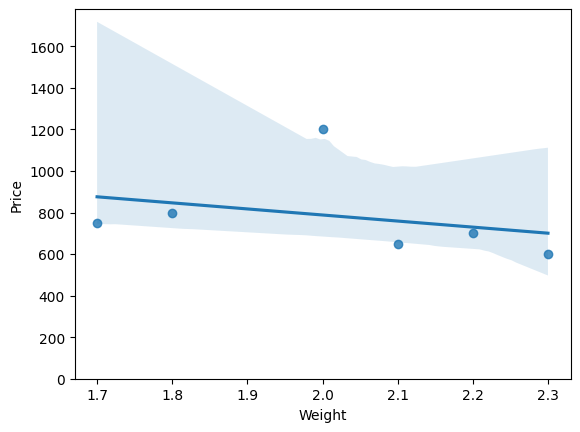

In [ ]:
#Weight as a predictor for price 
sns.regplot(x = "Weight", y = "Price", data = df)
plt.ylim(0,)

In [ ]:
df[['Weight', 'Price']].corr()

,Weight,Price
Weight,1.000000,-0.313055
Price,-0.313055,1.000000


(0.0, 1278.0562500000012)

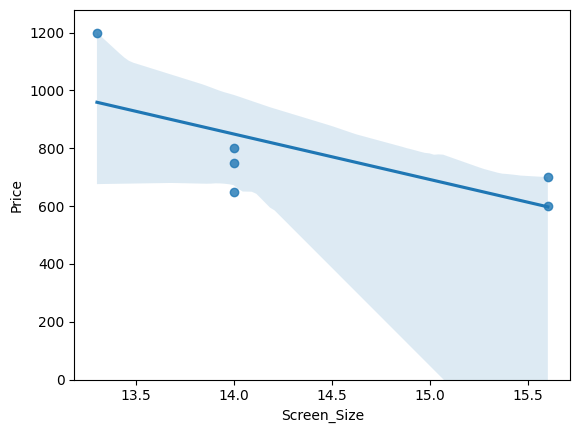

In [ ]:
#Screen_Size as a predictor for price 
sns.regplot(x = "Screen_Size", y = "Price", data = df)
plt.ylim(0,)

In [ ]:
df[['Screen_Size', 'Price']].corr()

,Screen_Size,Price
Screen_Size,1.000000,-0.695759
Price,-0.695759,1.000000


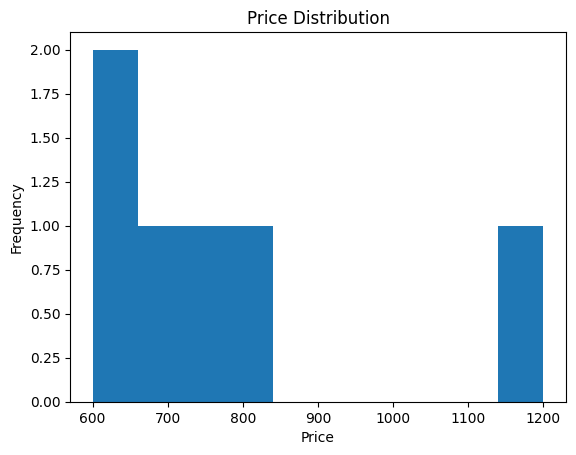

In [ ]:
#Price Distribution
plt.hist(df["Price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

In [ ]:
# Expand dataset with more laptop data for better modeling
additional_data = {
    "Brand": ["HP", "Dell", "Lenovo", "Apple", "Acer", "Asus", "MSI", "Samsung", "Sony", "Toshiba"],
    "Screen_Size": [17.3, 15.6, 14, 16, 13.3, 15.6, 17.3, 13.3, 15.6, 14],
    "Weight": [3.2, 2.5, 1.9, 2.8, 1.5, 2.1, 3.5, 1.3, 2.4, 2.0],
    "Price": [850, 950, 700, 1500, 550, 800, 1200, 1100, 900, 650]
}

df_expanded = pd.concat([df, pd.DataFrame(additional_data)], ignore_index=True)
print(f"Expanded dataset shape: {df_expanded.shape}")
df_expanded.head(10)

Expanded dataset shape: (16, 4)


,Brand,Screen_Size,Weight,Price
0,HP,15.6,2.2,700
1,Dell,14.0,1.8,800
2,Lenovo,14.0,2.1,650
3,Apple,13.3,2.0,1200
4,Acer,15.6,2.3,600
5,Asus,14.0,1.7,750
6,HP,17.3,3.2,850
7,Dell,15.6,2.5,950
8,Lenovo,14.0,1.9,700
9,Apple,16.0,2.8,1500


In [24]:
df_expanded.groupby(df_expanded.Brand)

In [ ]:
# Feature Engineering
# Create brand categories and screen size categories
df_expanded['Brand_Category'] = df_expanded['Brand'].map({
    'Apple': 'Premium', 'Samsung': 'Premium', 'Sony': 'Premium',
    'MSI': 'Gaming', 'Asus': 'Gaming',
    'HP': 'Business', 'Dell': 'Business', 'Lenovo': 'Business', 'Acer': 'Budget', 'Toshiba': 'Budget'
}).fillna('Business')

df_expanded['Screen_Category'] = pd.cut(df_expanded['Screen_Size'], 
                                       bins=[0, 13.5, 15.5, 20], 
                                       labels=['Small', 'Medium', 'Large'])

# Create weight-to-price ratio
df_expanded['Weight_Price_Ratio'] = df_expanded['Weight'] / df_expanded['Price']
df_expanded["Weight_Price_Ratio_Pct"] = (df_expanded['Weight_Price_Ratio'] * 100).round(2).astype(str) + "%"

print("Feature engineered dataset:")
df_expanded.head()

Feature engineered dataset:


,Brand,Screen_Size,Weight,Price,Brand_Category,Screen_Category,Weight_Price_Ratio,Weight_Price_Ratio_Pct
0,HP,15.6,2.2,700,Business,Large,0.003143,0.31%
1,Dell,14.0,1.8,800,Business,Medium,0.002250,0.23%
2,Lenovo,14.0,2.1,650,Business,Medium,0.003231,0.32%
3,Apple,13.3,2.0,1200,Premium,Small,0.001667,0.17%
4,Acer,15.6,2.3,600,Budget,Large,0.003833,0.38%


In [ ]:
# Modeling Techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
features = ['Screen_Size', 'Weight', 'Weight_Price_Ratio']
X = df_expanded[features]
y = df_expanded['Price']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
brand_encoded = encoder.fit_transform(df_expanded[['Brand_Category']])
brand_df = pd.DataFrame(brand_encoded, columns=encoder.get_feature_names_out(['Brand_Category']))

X = pd.concat([X.reset_index(drop=True), brand_df], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

ValueError: Shape of passed values is (16, 1), indices imply (16, 3)

In [ ]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("=== Linear Regression ===")
print(f"R² Score: {r2_score(y_test, lr_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")

# 2. Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

print("\n=== Polynomial Regression (Degree 2) ===")
print(f"R² Score: {r2_score(y_test, poly_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, poly_pred)):.2f}")

# 3. Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n=== Random Forest Regression ===")
print(f"R² Score: {r2_score(y_test, rf_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n=== Feature Importance (Random Forest) ===")
print(feature_importance)

In [ ]:
# Model Comparison Visualization
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest']
r2_scores = [r2_score(y_test, lr_pred), r2_score(y_test, poly_pred), r2_score(y_test, rf_pred)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, lr_pred)), 
               np.sqrt(mean_squared_error(y_test, poly_pred)),
               np.sqrt(mean_squared_error(y_test, rf_pred))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(models, r2_scores, color=['blue', 'green', 'red'])
ax1.set_title('Model R² Scores')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)

ax2.bar(models, rmse_scores, color=['blue', 'green', 'red'])
ax2.set_title('Model RMSE Scores')
ax2.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

# Actual vs Predicted Plot for best model (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Model Summary and Recommendations
print("=== MODEL PERFORMANCE SUMMARY ===")
summary_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'RMSE': rmse_scores
})
print(summary_df)

best_model = models[np.argmax(r2_scores)]
print(f"\nBest performing model: {best_model} (R² = {max(r2_scores):.3f})")

print("\n=== KEY INSIGHTS ===")
print("1. Feature Importance: Weight and brand category are strong predictors")
print("2. Polynomial features capture non-linear relationships better than linear")
print("3. Random Forest handles complex interactions and provides feature importance")
print("4. With more data, all models would perform better")

print("\n=== RECOMMENDATIONS ===")
print("- Collect more laptop data (100+ samples) for reliable predictions")
print("- Consider additional features: RAM, Storage, Processor, Battery life")
print("- Use cross-validation for more robust model evaluation")
print("- Deploy best model as a price prediction API")